Loading data


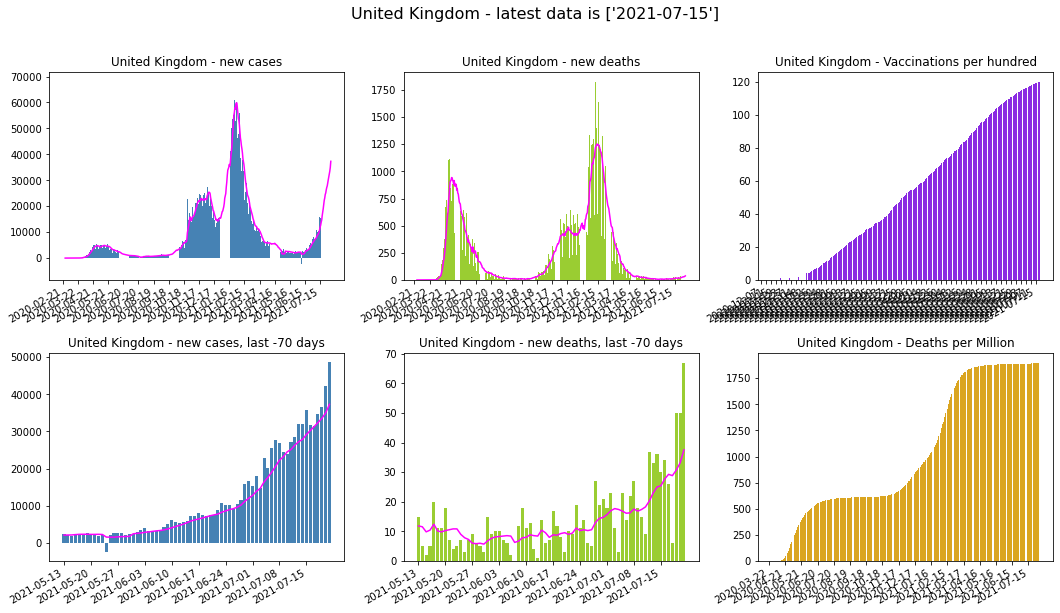

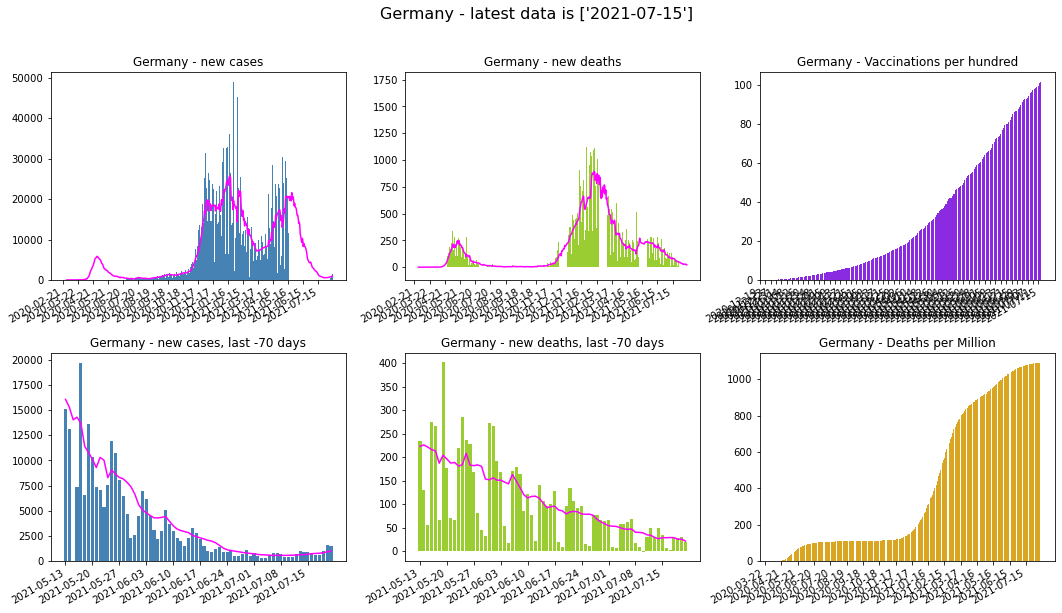

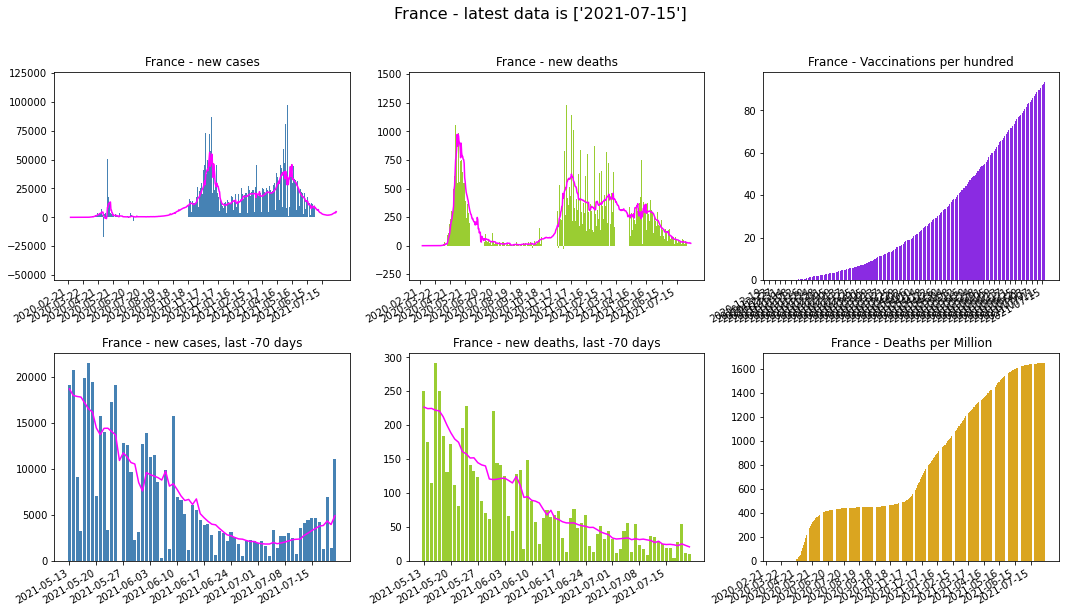

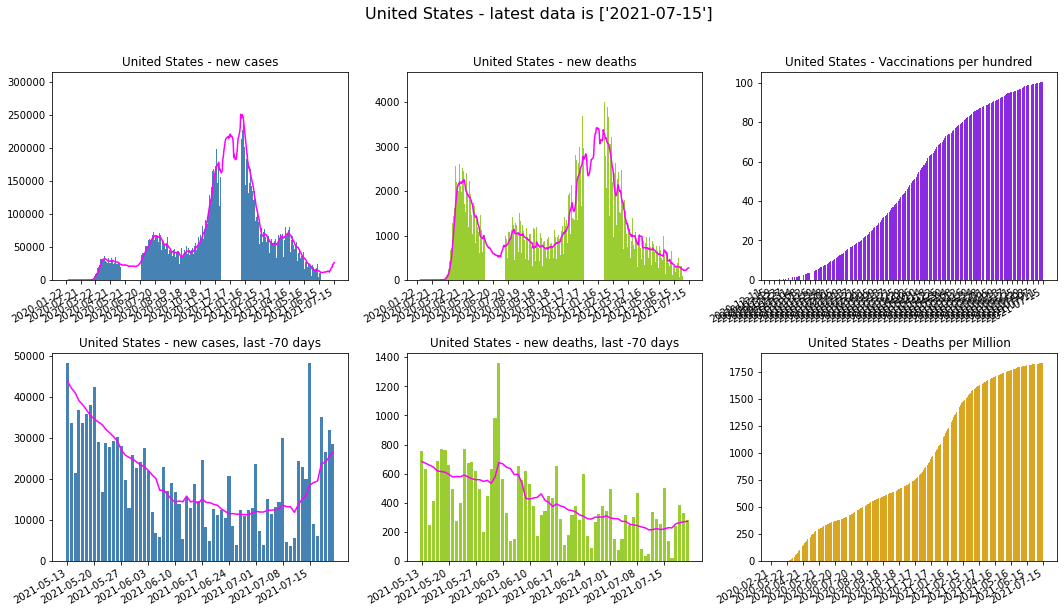

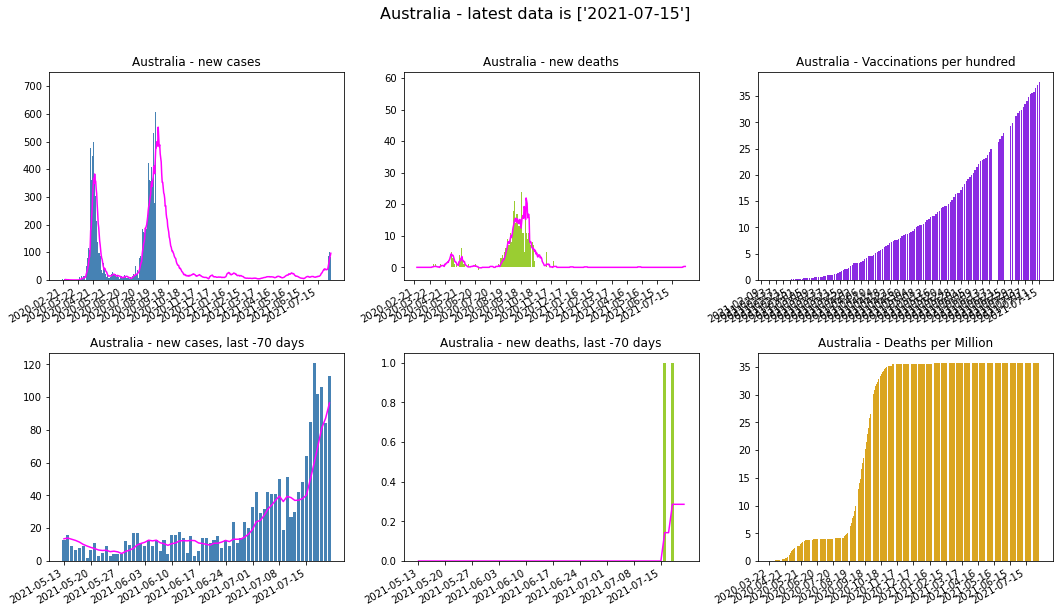

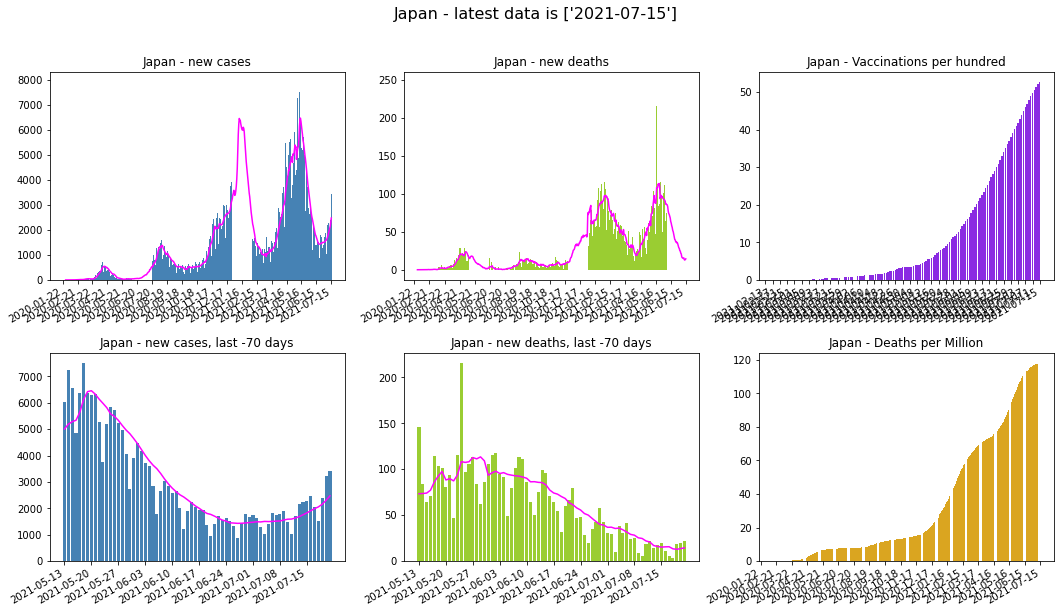

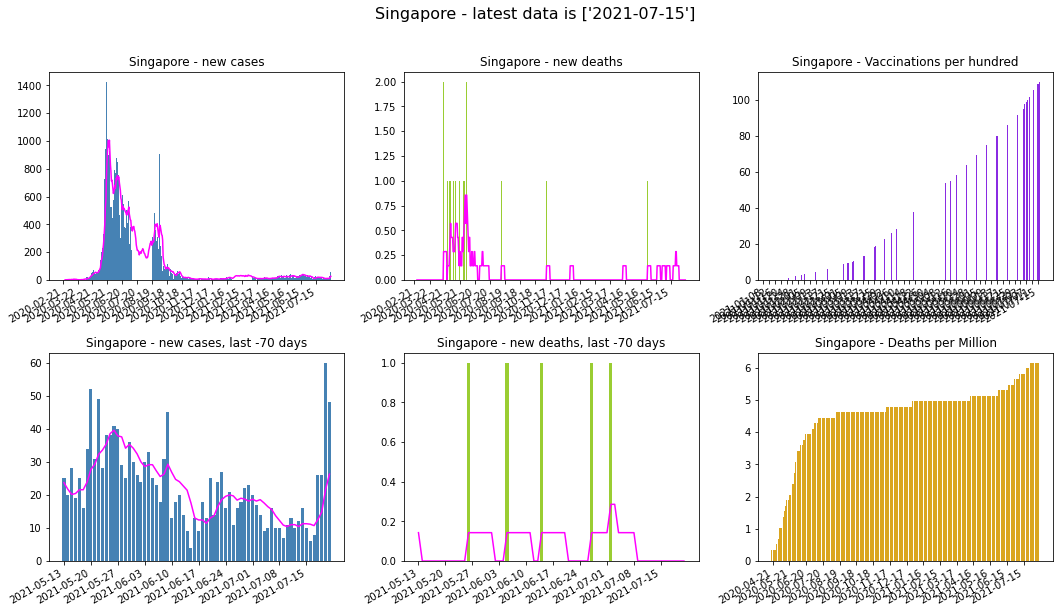

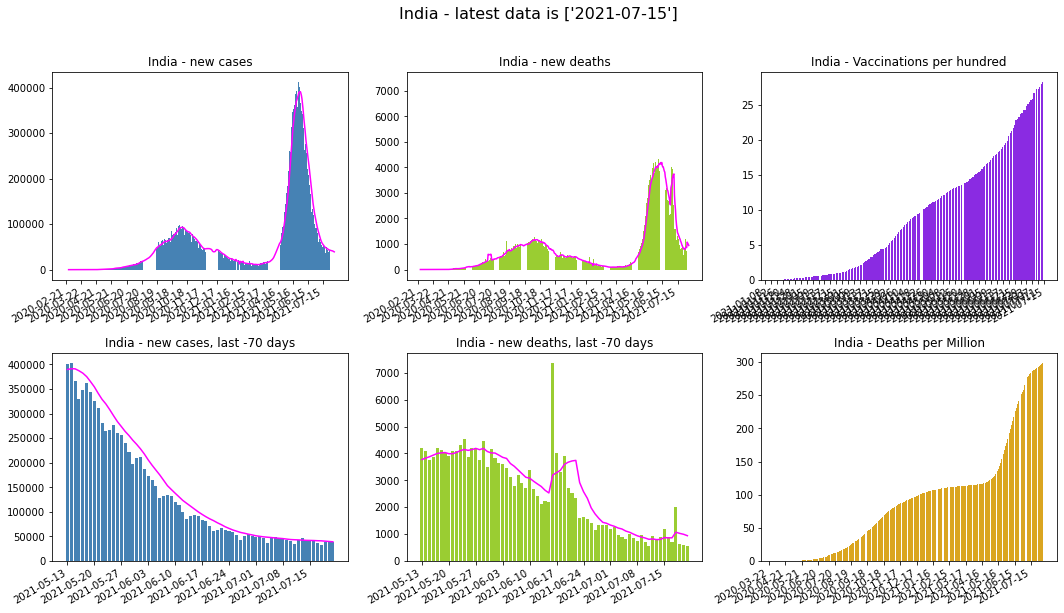

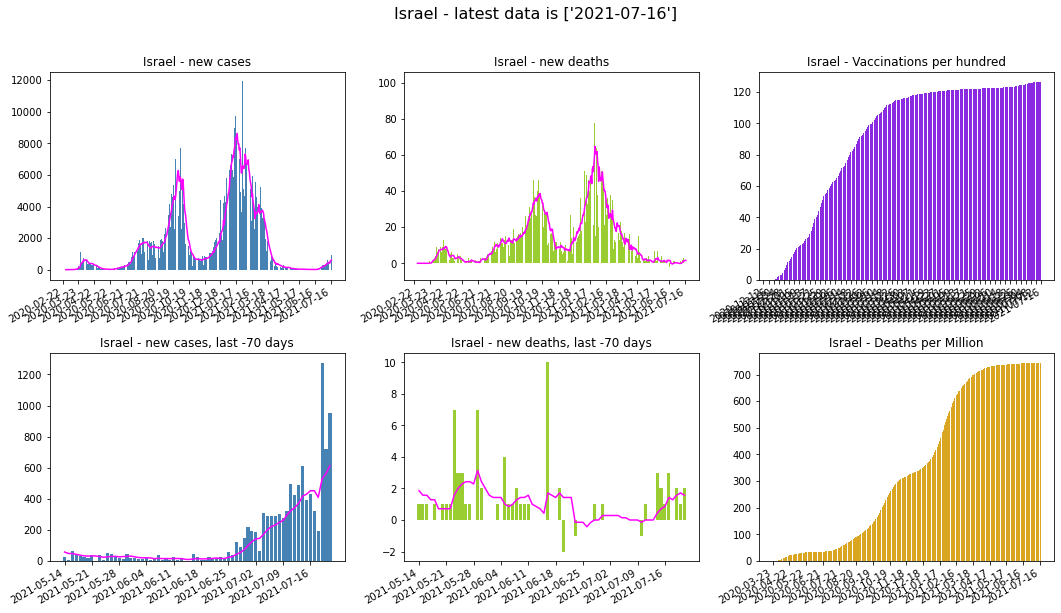

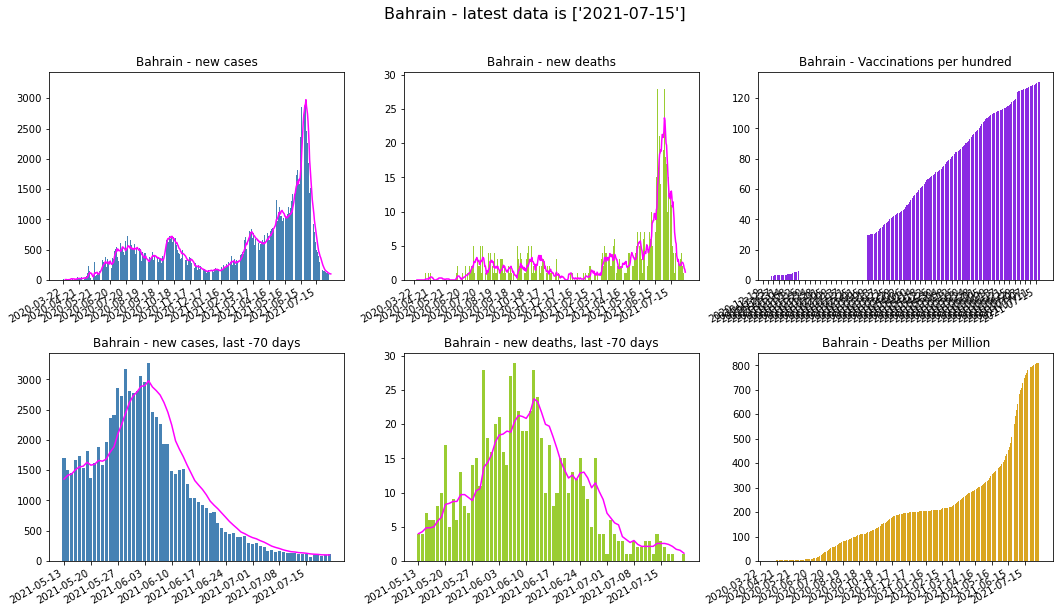

In [1]:
# Data from https://covid.ourworldindata.org/data/owid-covid-data.csv

import pandas as pd
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from pathlib import Path

downloads = f'{Path.home()}\\Downloads'

ageData = dt.timedelta(hours=1, minutes=0)    # this sets up how old the data can be before we load it again.
try:
    if dataStamp + ageData < dt.datetime.today():
        load = True
        print('Data will be reloaded')
    else:
        load = False
        print(f'Data already loaded: {dataStamp.strftime("%b-%d %H:%M")}')
except:
    load = True

# Load the data
if load:
    print('Loading data')
    df = pd.read_csv('https://github.com/owid/covid-19-data/raw/master/public/data/owid-covid-data.csv')
#    df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
    
    dataStamp = dt.datetime.today()

df.sort_values(by = 'date', inplace=True)    # Make sure it is in date order.

xrot = 30    # this just shifts the date labels so they can be read

# list the iso country codes that we want to report on
for country in ['GBR', 'DEU', 'FRA', 'USA', 'AUS', 'JPN', 'SGP', 'IND', 'ISR', 'BHR']:
    df1 = df[df.iso_code == country]    # subset the data
    for name in df[df.iso_code == country]['location'][0:1]:
        pass     # just pass the name back
    x = []    # setup an empty array for the X values
    for date in df1.date.tolist():    # pop each date into the x-axis
        x.append(date)
    
    plt.rcParams["figure.figsize"] = (18,9)    # Create the Plot size
    fig , ax = plt.subplots(2,3)    # Create the plot space
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35) # add horizontal spacing
    fig.suptitle(f"{name} - latest data is {x[-1:]}", fontsize=16)    # title the figure
    
    ticks = []    # empty array of tick positions
    i, step = 0, 30    # we use i as the tick position and step as how many to skip so we space the labels out
    for tick in x[::step]:    # loop through and slice each step
        ticks.append(i)    # add the position number to the array
        i += step    # increment the tick position
    y1 = df1.new_cases    # set the y axis values
    y2 = df1.new_cases_smoothed
    y3 = df1.new_deaths
    y4 = df1.new_deaths_smoothed
    y5 = df1.total_vaccinations_per_hundred
    y6 = df1.total_deaths_per_million
    
    plt.subplot(231)    # top left
    plt.title(f"{name} - new cases")
#    plt.xticks(ticks, x[::step], rotation=xrot)
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x, y1, color='steelblue')
    plt.plot(x, y2, color='magenta')

    plt.subplot(232)    # top centre
    plt.title(f"{name} - new deaths")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x, y3, color='yellowgreen')
    plt.plot(x, y4, color='magenta')

    plt.subplot(236)    # bottom right
    plt.title(f"{name} - Deaths per Million")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x, y6, color='goldenrod')

    ### This is for the vaccinations, as we have less data we need more frequent data labels. 
    ticks = []    # empty array of tick positions
    i, step = 0, 4    # we use i as the tick position and step as how many to skip so we space the labels out
    for tick in x[::step]:    # loop through and slice each step
        ticks.append(i)    # add the position number to the array
        i += step    # increment the tick position

    plt.subplot(233)    # top right
    plt.title(f"{name} - Vaccinations per hundred")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
#    plt.xticks(rotation=xrot)
    plt.bar(x, y5, color='blueviolet')

    ### This section just slices the same date but only the last 35 values
    recent = -70    # this sets the look back value
    i, step = 0, 7
    ticks = []
    for tick in x[recent::step]:
        ticks.append(i)
        i += step

    plt.subplot(234)    # bottom left
    plt.title(f"{name} - new cases, last {recent} days")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x[recent:], y1[recent:], color='steelblue')
    plt.plot(x[recent:], y2[recent:], color='magenta')

    plt.subplot(235)    # bottom centre
    plt.title(f"{name} - new deaths, last {recent} days")
    plt.xticks(ticks, x[ -(len(ticks)-1)*step-1  ::step], rotation=xrot, ha='right')
    plt.bar(x[recent:], y3[recent:], color='yellowgreen')
    plt.plot(x[recent:], y4[recent:], color='magenta')

    fig.savefig(f'{downloads}\\{country}_OWD.png')

MEX


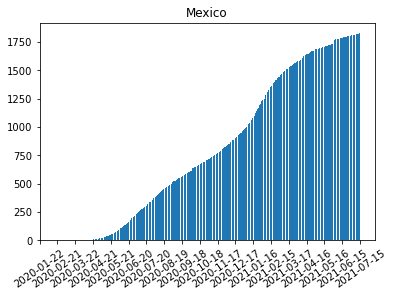

In [2]:
i = 0
for country in df.iso_code.unique():
    print(country)
    if pd.isna(country):
        pass
    else:
        df1 = df.loc[df.iso_code == country]
        plt.rcParams["figure.figsize"] = (6,4)
        plt.bar(df1.date, df1.total_deaths_per_million)
        plt.xticks(df1.date[-(df1.date.size//30) * 30 -1 ::30] ,  rotation=35)
        plt.title(df1.location.unique()[0])
        plt.show()
        i += 1
    if i == 1: break

In [3]:
for code in df.iso_code.unique():
    if not pd.isna(code):
        print(code)

MEX
ARG
THA
IRL
PER
PRT
GRC
LVA
EST
DEU
TWN
KOR
JPN
OWID_NAM
USA
OWID_WRL
OWID_ASI
CHN
OWID_EUN
VNM
OWID_EUR
SGP
HKG
FRA
OWID_OCE
NPL
MYS
AUS
CAN
LKA
KHM
FIN
ARE
PHL
FJI
IND
ITA
RUS
GBR
ESP
SWE
DNK
SVN
BEL
MLT
ZAF
OWID_INT
MAR
OWID_AFR
EGY
GTM
IRN
ISR
LBN
OWID_SAM
CHL
NOR
IRQ
LUX
BHR
OMN
AFG
KWT
PAK
ALB
DZA
CHE
HRV
AUT
BRA
GEO
ROU
MKD
SRB
NLD
SMR
ISL
NGA
SEN
NZL
BLR
QAT
LTU
MCO
CZE
AZE
DOM
ECU
ARM
AND
SAU
IDN
JOR
UKR
HUN
BGD
TUN
TGO
LIE
LBY
POL
PSE
BIH
CMR
SVK
VAT
COL
CRI
KEN
BTN
PRY
MDV
MDA
BGR
BRN
PAN
CYP
BFA
MNG
COD
BOL
CIV
HND
JAM
TUR
SDN
CUB
GUY
GIN
KAZ
ATG
ETH
URY
RWA
GAB
SYC
VCT
SUR
TTO
SWZ
NAM
MRT
LCA
OWID_KOS
GHA
VEN
COG
UZB
CAF
GNQ
TZA
BHS
LBR
BEN
SOM
MNE
BRB
GMB
KGZ
DJI
MUS
ZMB
SLV
TCD
NIC
AGO
NER
MDG
HTI
CPV
ZWE
PNG
UGA
ERI
DMA
TLS
GRD
SYR
MOZ
BLZ
LAO
GNB
MLI
KNA
MMR
MWI
BWA
BDI
SLE
SSD
STP
YEM
COM
TJK
LSO
SLB
MHL
VUT
WSM
CYM
BMU
GIB
TCA
OWID_CYN
FSM
IMN
GGY
GRL
FRO
NCL
PYF
SHN
AIA
FLK
MAC
MSR
JEY
WLF
ABW
CUW
TKM
NRU
BES
TON
TUV
SXM
KIR
VGB
COK
PCN
NIU


In [4]:
df = df.loc[df.iso_code != 'OWID_WRL']
for item in ['total_vaccinations_per_hundred', 'total_deaths_per_million', 'total_cases_per_million',
            'icu_patients_per_million', 'total_tests_per_thousand', 'new_deaths_per_million']:
    print('####')
    print(df.loc[df[item].idxmax()][['location',item]])

####
location                          Gibraltar
total_vaccinations_per_hundred       232.35
Name: 36638, dtype: object
####
location                        Peru
total_deaths_per_million    5909.436
Name: 73665, dtype: object
####
location                      Andorra
total_cases_per_million    184287.841
Name: 2541, dtype: object
####
location                    Czechia
icu_patients_per_million    192.735
Name: 24267, dtype: object
####
location                       Cyprus
total_tests_per_thousand    10161.716
Name: 23886, dtype: object
####
location                  Ecuador
new_deaths_per_million    218.329
Name: 27069, dtype: object


In [5]:
df.loc[df.iso_code == 'GBR'][['date','new_deaths']].sort_values(by=['new_deaths'], ascending=False)[:5]

,date,new_deaths
97134,2021-01-20,1826.0
97141,2021-01-27,1726.0
97140,2021-01-26,1636.0
97133,2021-01-19,1612.0
97127,2021-01-13,1568.0


In [6]:
df.loc[df.iso_code == 'GBR'][['date','new_cases']].sort_values(by=['new_cases'], ascending=False)[:5]

,date,new_cases
97122,2021-01-08,68192.0
97120,2021-01-06,62556.0
97119,2021-01-05,61087.0
97123,2021-01-09,60098.0
97118,2021-01-04,58923.0


In [7]:
i = df.loc[df.iso_code == 'DNK'].last_valid_index()
df.loc[i]

iso_code                             DNK
continent                         Europe
location                         Denmark
date                          2021-07-15
total_cases                    304439.00
                                 ...    
handwashing_facilities               NaN
hospital_beds_per_thousand          2.50
life_expectancy                    80.90
human_development_index             0.94
excess_mortality                     NaN
Name: 25410, Length: 60, dtype: object

In [8]:
EU_Countries = df.loc[df.continent == 'Europe']['location'].unique()

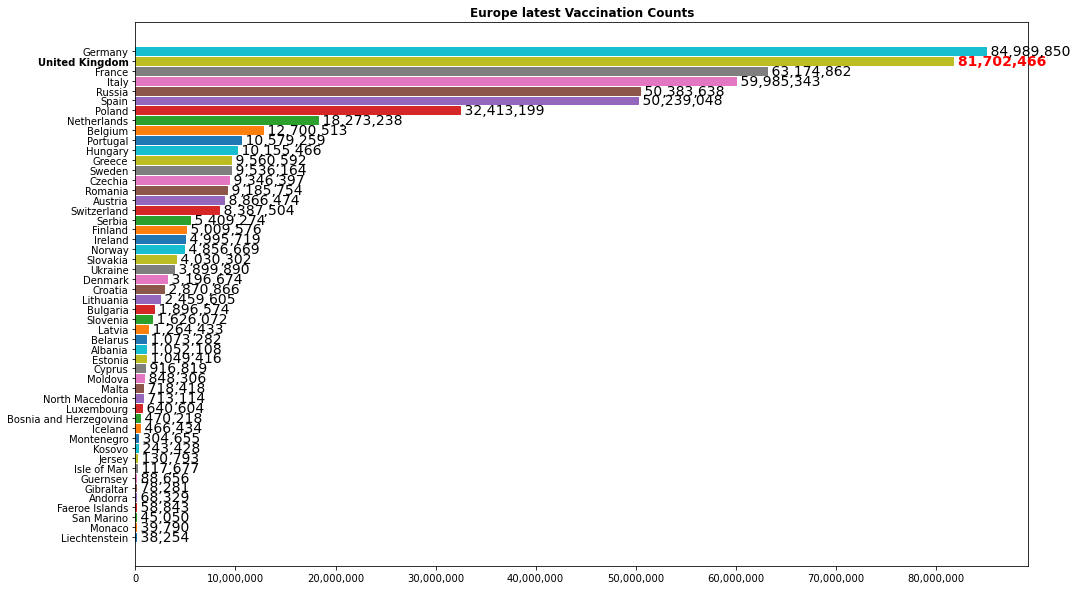

In [9]:
## Function to report on EU countries in order for whichever item is given

## First we need a simple formatter to reformat the text value of the numbers ont he x-axis
def format_func(value, tick_number):
    return(f'{value:,.15g}')


## Next we need the function that sorts the country data and makes the chart
## receive the list of countries, the DataFrame, the reporting label we are grpahing and the title of teh chart
def EU_order(EU_Countries, df, label, title):
    x = []    # create an empty list for the x values
    y = []    # create an empty list for the y values
    for country in EU_Countries:
        idx = df.loc[df.location == country][label].last_valid_index()    # get the index location that matches the highest result
        if idx:    # sometimes it's a None value reuslt from the above so only do when a valid index was returned
            val = df.loc[idx][label]    # get the value
            x.append(country)    # add to the x list
            y.append(val)    # add to the y list

    newdf = pd.DataFrame( {'country': x, 'counter': y})    # bang the x and y back into a dataframe so that we can
    newdf.sort_values(by='counter', inplace=True, ignore_index=True)    # sort it ready for charting

    fig, ax = plt.subplots(figsize = (16,10))    # set a new figure up

    # create an array with each of the bars in - this also create the horizontal bars on the chart
    bars = ax.barh( newdf['country'], newdf['counter'] )    # charting the country and the counter value
    UK_row = newdf.index[newdf['country'] == 'United Kingdom'].tolist()[0]    # now we need to find where is the UK data
    ax.get_yticklabels()[UK_row].set_weight('bold')    # setting the UK tick label legend to bold
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))    # this is getting rid of the scientific number values
    i = 0    # set a counter
    for bar in bars:    # iterate the bars just so that we can annotate them with thier actual values on
        # set the format differently for the UK line
        col1, weigh = 'k', 'normal'
        if UK_row == i: col1, weigh = 'r', 'bold'
        value = (newdf.loc[i]['counter'])    # use the counter to find the value from the DataFrame
        ax.annotate(f' {value:,.9g}',    # annotate the value and format the number
                   xy = ( (bar.get_x() + bar.get_width() ) , bar.get_y() ),    # get the position to pop the text on
                   fontsize = 14, color=col1, weight=weigh    # set the style
                   )
        bar.set_color(f'C{i}')    # set the color also using the counter
        i += 1

    plt.title(title, weight='bold')    # set the title

    plt.show()    # show it

    fig.savefig(f'{downloads}\\{label}_OWD.png')    # save a PNG file in the downloads folder

## Call the function to show the total vaccinations
EU_order(EU_Countries, df, 'total_vaccinations', 'Europe latest Vaccination Counts')

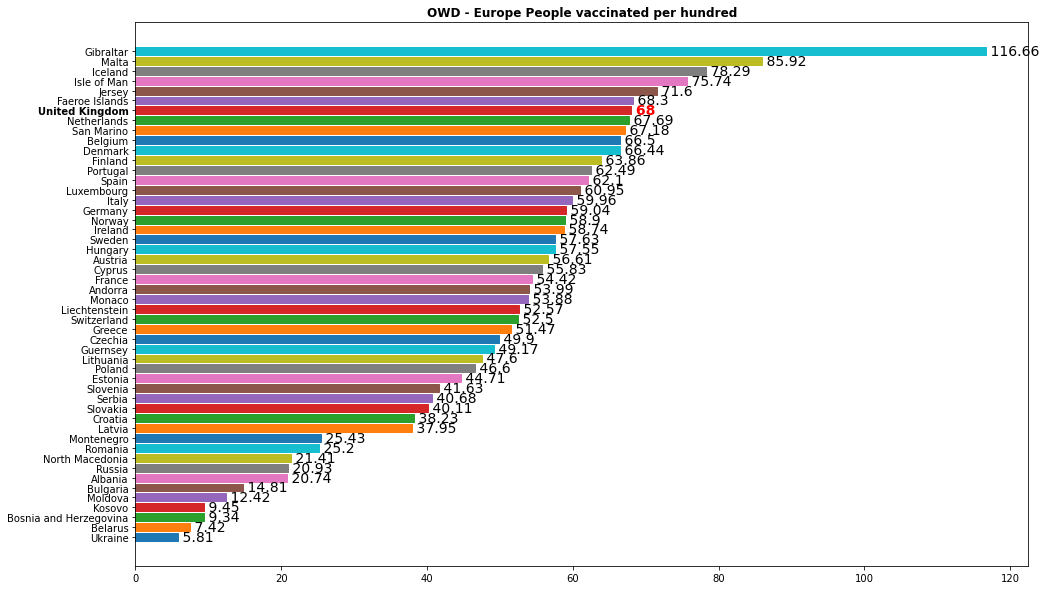

In [10]:
EU_order(EU_Countries, df, 'people_vaccinated_per_hundred', 'OWD - Europe People vaccinated per hundred')

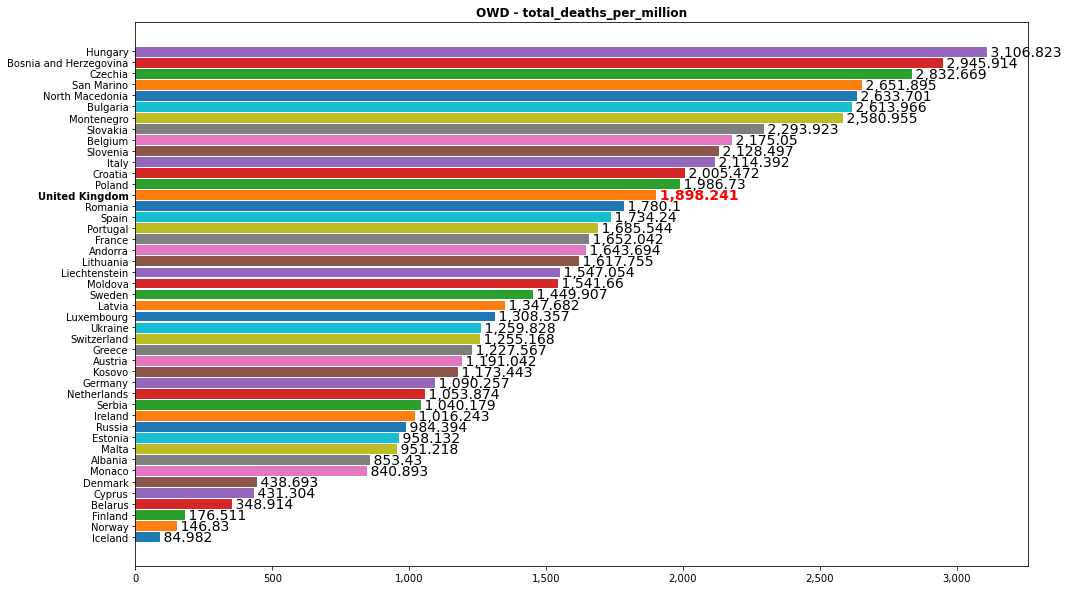

In [11]:
EU_order(EU_Countries, df, 'total_deaths_per_million', 'OWD - total_deaths_per_million')

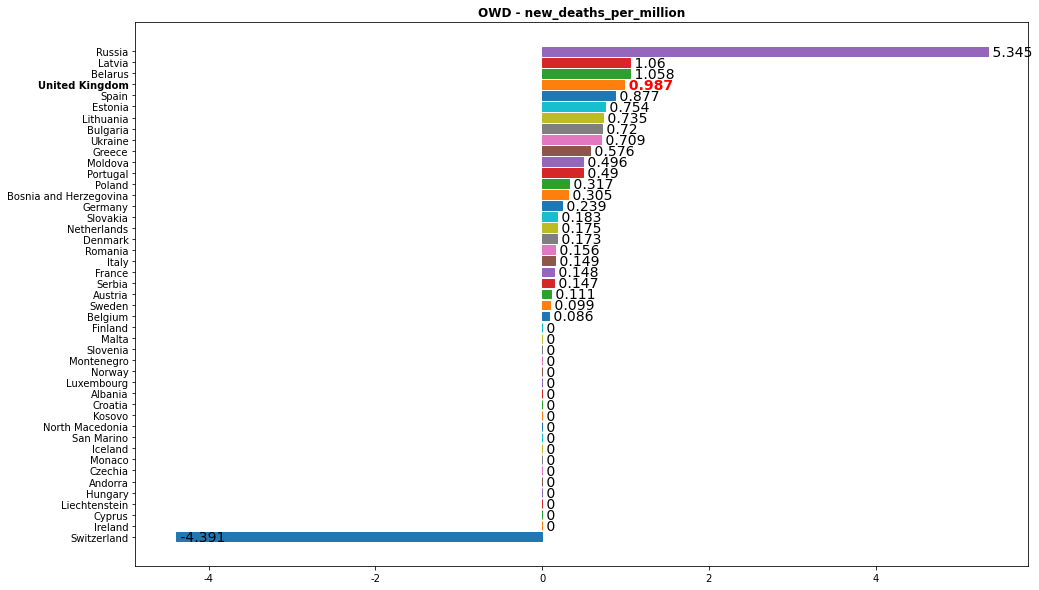

In [12]:

EU_order(EU_Countries, df, 'new_deaths_per_million', 'OWD - new_deaths_per_million')

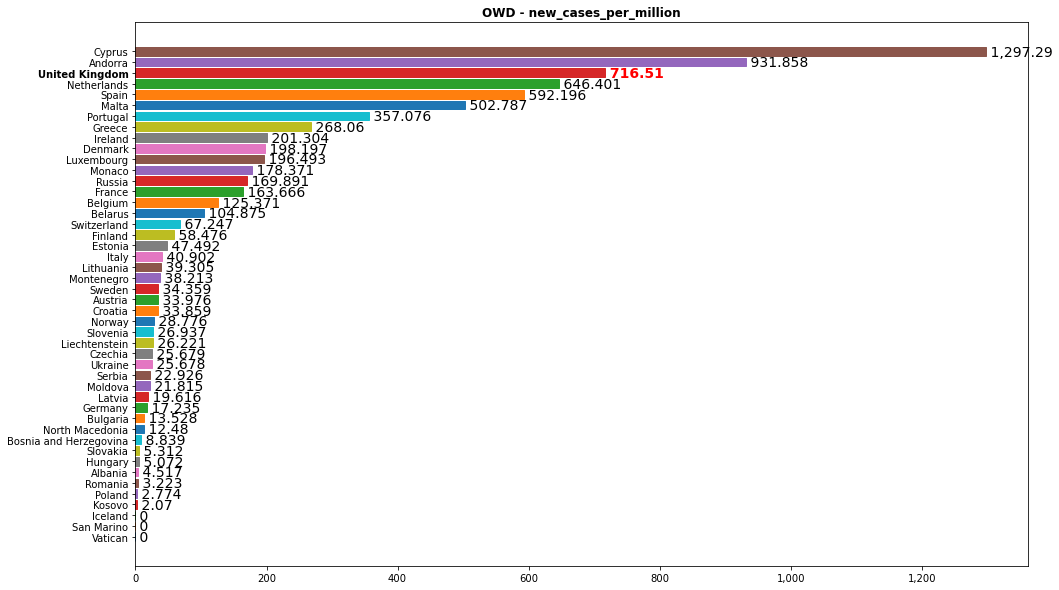

In [13]:
EU_order(EU_Countries, df, 'new_cases_per_million', 'OWD - new_cases_per_million')

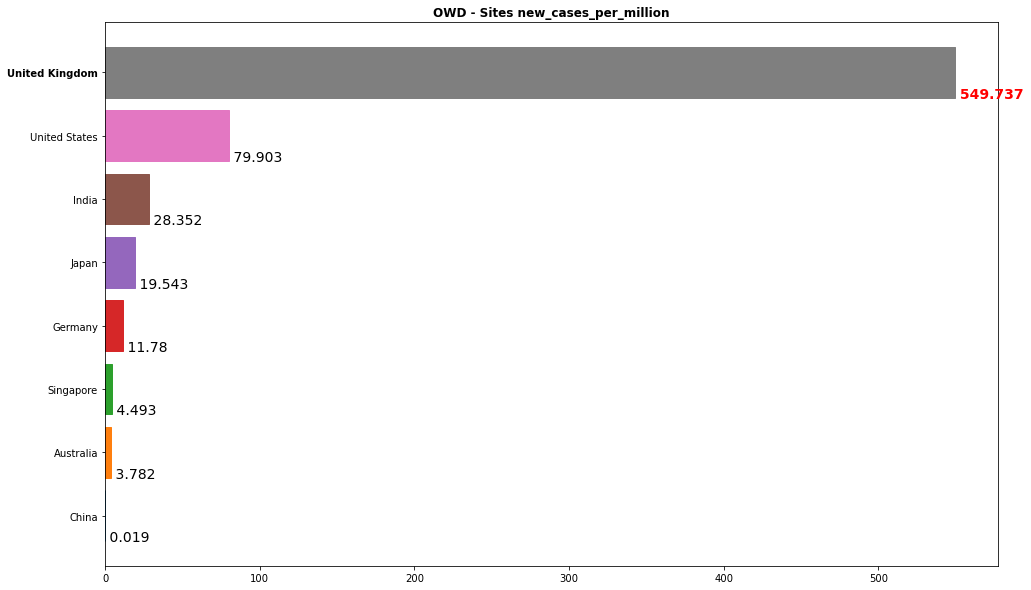

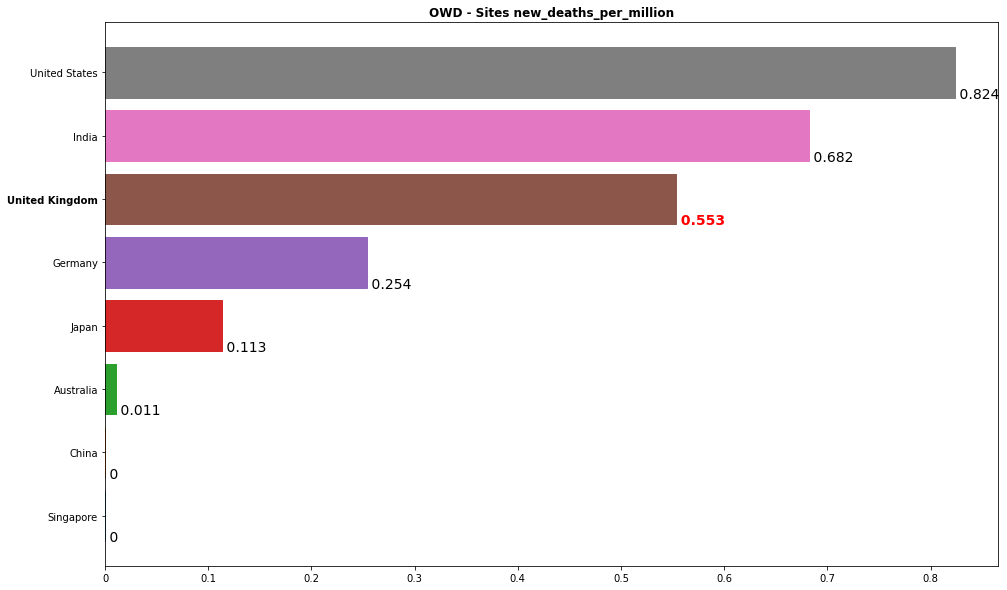

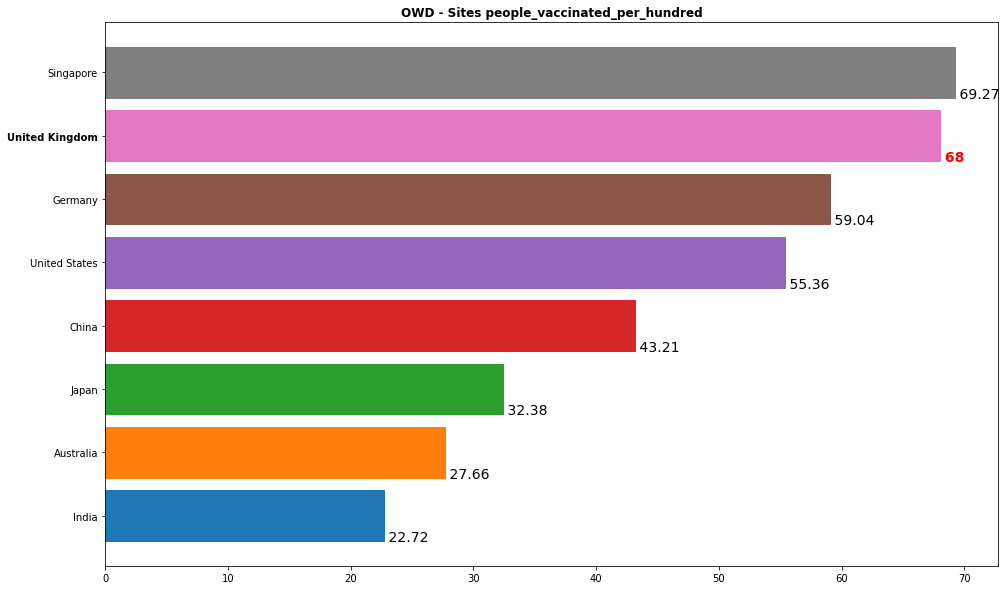

In [14]:
EU_Countries = ['Australia', 'Japan', 'India', 'United Kingdom', 'Singapore', 'Germany', 'United States', 'China']
EU_order(EU_Countries, df, 'new_cases_smoothed_per_million', 'OWD - Sites new_cases_per_million')
EU_order(EU_Countries, df, 'new_deaths_smoothed_per_million', 'OWD - Sites new_deaths_per_million')
EU_order(EU_Countries, df, 'people_vaccinated_per_hundred', 'OWD - Sites people_vaccinated_per_hundred')

In [15]:
x.index('United Kingdom')

ValueError: 'United Kingdom' is not in list

In [ ]:
idx = newdf.index[newdf['country'] == 'United Kingdom']
idx

In [ ]:
newdf.shape

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.loc[df.iso_code == 'DNK']

In [ ]:
df.shape

In [ ]:
pd.set_option('display.max_columns', 60)
pd.set_option('display.max_rows', 60)
a = df.loc[df.location == 'United Kingdom'].last_valid_index()
print(df.loc[a-3])

In [ ]:
df.loc[df.iso_code == 'GBR'][['new_cases', 'new_deaths']].hist()

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.to_parquet(f'{downloads}/df.parquet')
